In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = np.array([])

for i in range(10):
    data = np.array(pd.read_csv(f'American Sign Language Digits Dataset/{i}/Output Images - Sign {i}.csv'))
    df = np.append(df,data)
df = df.reshape((5000,65))
np.random.shuffle(df)
paths = df[:,0]
X = df[:,1:64]
y = df[:,64]
X_scale = StandardScaler()
X = X_scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [17]:
#Returns a model given the training data
def svm_model_asl(c, X_train, Y_train, kernel='linear'):
    svm_model = svm.SVC(C=c, probability=False, kernel=kernel)
    svm_model.fit(X_train, Y_train)
    return svm_model

#Modifies the labels for 1 vs all classification
#e.g. if we are testing for "1", all the labels != 1 will be set to 0
def change_labels(Y_train, num):
    ans = np.array([1 if elem == num else 0 for elem in Y_train])
    return ans

In [4]:
#1 vs all classification

#predict given all 10 "1 vs all models"
def prediction(X, models):
    confidences = [model.predict(X) for model in models]
    ans = []
    for i in range(X.shape[0]):
        mostconfident = -1
        confidence = -1
        for j in range(10):
            if confidences[j][i] > confidence:
                confidence = confidences[j][i]
                mostconfident = j
        ans.append(mostconfident)
    return ans

#accuracy
def accuracy(Yhat, Y):
    correct = [1 if Yhat[i] == Y[i] else 0 for i in range(len(Y))]
    return sum(correct)/len(correct)

def svm_a(c, X_train, Y_train, X_test, Y_test, kernel):
    models = []
    for i in range(10):
        Y_train_temp = change_labels(Y_train,i)
        models.append(svm_model_asl(c,X_train, Y_train_temp, kernel))
    
    Yhat_train = prediction(X_train, models)
    acc_train = accuracy(Yhat_train, Y_train)
    
    Yhat_test = prediction(X_test, models)
    acc_test = accuracy(Yhat_test, Y_test)
    
    return (c, acc_train, acc_test)


In [16]:
models = svm_a(1, X_train, y_train, X_test, y_test, 'poly')

TypeError: __init__() got an unexpected keyword argument 'penalty'

In [ ]:
models

In [13]:
start,end = 2, 20
c = [start + (end - start) / 100 * cval for cval in range(0,100)]
train = []
test = []
for cval in c:
    res = svm_a(cval, X_train, y_train, X_test, y_test, 'rbf')
    train.append(res[1])
    test.append(res[2])

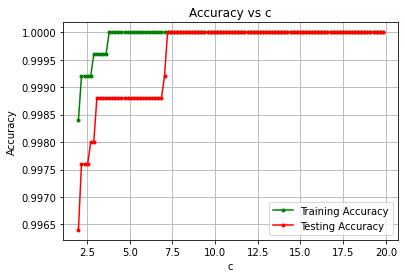

In [14]:
plt.plot(c,train,'.-',color='green')
plt.plot(c,test,'.-',color='red')
plt.title("Accuracy vs c")
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.grid()

In [12]:
test[-1]

1.0